<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vetorização-e-criação-do-modelo" data-toc-modified-id="Vetorização-e-criação-do-modelo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vetorização e criação do modelo</a></span></li><li><span><a href="#Model_BOW_S_StopWords" data-toc-modified-id="Model_BOW_S_StopWords-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model_BOW_S_StopWords</a></span></li><li><span><a href="#Model_BOW_C_StopWords" data-toc-modified-id="Model_BOW_C_StopWords-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model_BOW_C_StopWords</a></span></li></ul></div>

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_set = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(data_set))

5574


In [3]:
for id_data, data_set in enumerate(data_set[:5]):
    print(id_data, data_set,'\n')

0 ﻿ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 



In [3]:
import pandas as pd
data_set = pd.read_csv('SMSSpamCollection',sep='\t',names=['Classe','Mensagem'])
data_set.head()

,Classe,Mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data_set.groupby('Classe').describe()

Mensagem                                                               
          count unique                                                top freq
Classe                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [5]:
data_set['Comprimento'] = data_set['Mensagem'].apply(len)
data_set

,Classe,Mensagem,Comprimento
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


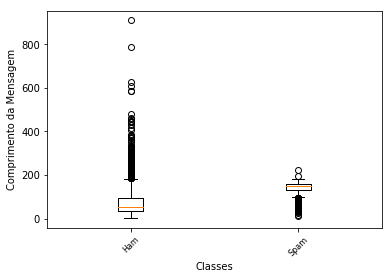

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.boxplot([data_set[data_set['Classe']=='ham']['Comprimento'],data_set[data_set['Classe']=='spam']['Comprimento']])
ax.set_xticklabels(['Ham','Spam'], rotation=45, fontsize=8)
ax.set_ylabel('Comprimento da Mensagem')
ax.set_xlabel('Classes')
plt.savefig('BoxPlot_Comprimentos')

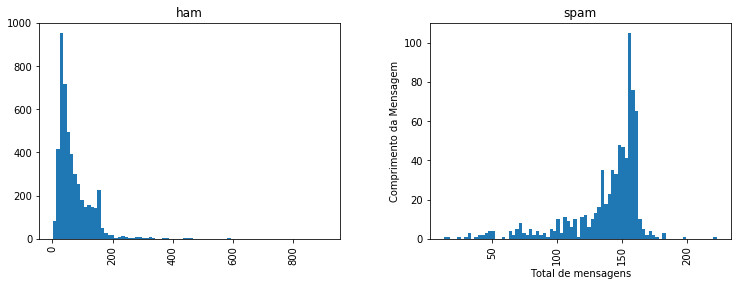

In [8]:
data_set.hist(column='Comprimento', by='Classe', bins=80,figsize=(12,4))
plt.ylabel('Comprimento da Mensagem')
plt.xlabel('Total de mensagens')
plt.savefig('Figuras\HistPlot_Comprimentos')

In [9]:
def text_process(mess):
    # Retira pontuações
    nopunc = [char for char in mess if char not in string.punctuation]

    # Junta-os para formar strings
    nopunc = ''.join(nopunc)
    # Remove as stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
def text_process2(mess):
    # Retira pontuações
    #nopunc = [char for char in mess if char not in string.punctuation]

    # Junta-os para formar strings
   # nopunc = ''.join(nopunc)
    
    # Remove as stopwords
    return [word for word in mess.split()]

In [11]:
import string

def text_split_num(mess):
    return len(mess.split())

def text_process_num(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return len([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [13]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [15]:
from nltk.corpus import stopwords
len(stopwords.words('english'))# Mostre alguns exemplos de stopwords

179

In [16]:
data_set2=data_set['Mensagem'].apply(text_process)
data_set3 = data_set2.copy()

In [17]:
print("No inicio o texto tinha %s palavras, depois passou a ter %s palavras" % (len(data_set['Mensagem'][0].split())  ,len(text_process(data_set['Mensagem'][0])) )   )

No inicio o texto tinha 20 palavras, depois passou a ter 16 palavras


In [19]:
data_set['Total de palavras c stop']=data_set['Mensagem'].apply(text_split_num)
data_set['Total de palavras s stop']=data_set['Mensagem'].apply(text_process_num)

In [20]:
data_set

,Classe,Mensagem,Comprimento,Total de palavras c stop,Total de palavras s stop
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,16
1,ham,Ok lar... Joking wif u oni...,29,6,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,23
3,ham,U dun say so early hor... U c already then say...,49,11,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,8
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,32,19
6,ham,Even my brother is not like to speak with me. ...,77,16,8
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,26,16
8,spam,WINNER!! As a valued network customer you have...,157,26,18
9,spam,Had your mobile 11 months or more? U R entitle...,154,29,18


In [21]:
for word in range(0,5):
    print(len(data_set['Mensagem'][word].split()),",",len(text_process(data_set['Mensagem'][word])))


20 , 16
6 , 6
28 , 23
11 , 9
13 , 8


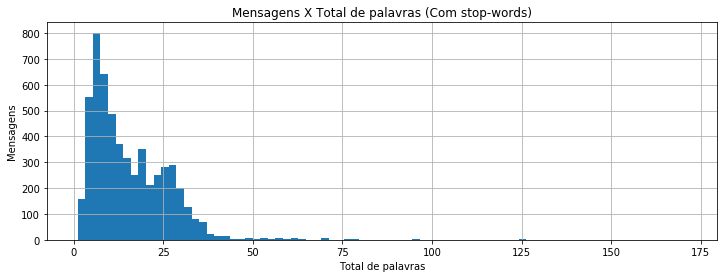

In [23]:
#Mensagens X Total de palavras (Com stop-words)
data_set.hist(column='Total de palavras c stop', bins=80,figsize=(12,4))
plt.ylabel('Mensagens')
plt.xlabel('Total de palavras')
plt.title('Mensagens X Total de palavras (Com stop-words)')
plt.savefig('Figuras\HistPlot_Total_palavras_Cstop')

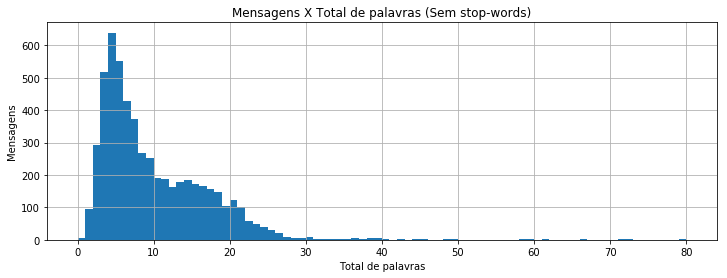

In [24]:
#Mensagens X Total de palavras (Com stop-words)
data_set.hist(column='Total de palavras s stop', bins=80,figsize=(12,4))
plt.ylabel('Mensagens')
plt.xlabel('Total de palavras')
plt.title('Mensagens X Total de palavras (Sem stop-words)')
plt.savefig('Figuras\HistPlot_Total_palavras_Sstop')


# Vetorização e criação do modelo

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

COM STOP WORDS

In [26]:
bow_transformer = CountVectorizer(analyzer=text_process2).fit(data_set['Mensagem'])
print(len(bow_transformer.vocabulary_))

15691


SEM STOP WORDS

In [27]:
# Talvez demor um pouco
bow_transformer = CountVectorizer(analyzer=text_process).fit(data_set['Mensagem'])

print(len(bow_transformer.vocabulary_))

11425


In [28]:
messages_bow = bow_transformer.transform(data_set['Mensagem'])

In [29]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [30]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
message4 = data_set['Mensagem'][3]
bow4 = bow_transformer.transform([message4])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [34]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [35]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Modelo

In [36]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [37]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, data_set['Classe'])

In [38]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', data_set.Classe[3])

predicted: ham
expected: ham


In [39]:
all_predictions = spam_detect_model.predict(messages_tfidf)
from sklearn.metrics import classification_report
print (classification_report(data_set['Classe'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Modelo-Pipeline

0.05

In [40]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=0.05)

#print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97       248
        spam       0.67      1.00      0.81        31

   micro avg       0.95      0.95      0.95       279
   macro avg       0.84      0.97      0.89       279
weighted avg       0.96      0.95      0.95       279



0.1

In [41]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=0.1)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

5014 558 5572
              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       517
        spam       0.68      1.00      0.81        41

   micro avg       0.97      0.97      0.97       558
   macro avg       0.84      0.98      0.90       558
weighted avg       0.98      0.97      0.97       558



0.2

In [42]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

4457 1115 5572
              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1016
        spam       0.69      1.00      0.82        99

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



0.3

In [43]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

3900 1672 5572
              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1501
        spam       0.72      1.00      0.84       171

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.86      0.98      0.91      1672
weighted avg       0.97      0.96      0.96      1672



In [44]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(label_test, predictions, average='weighted')[0]

0.9628078888396572

# Model_BOW_S_StopWords

In [45]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support
precision_2_Sstops = []
recall_2_Sstops = []
fscore_2_Sstops = []
for j in range(50,400,1):
    for i in range(1,15):
            precision = []
            recall = []
            fscore = []
            msg_train=''
            msg_test =''
            label_train =''
            label_test =''
            msg_train, msg_test, label_train, label_test = \
            train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=j/1000)


            pipeline = Pipeline([
                ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
                ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
                ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.

            ])

            pipeline.fit(msg_train,label_train)
            predictions = pipeline.predict(msg_test)
            precision.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[0])
            recall.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[1])
            fscore.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[2])
    precision_2_Sstops.append(np.mean(precision))
    recall_2_Sstops.append(np.mean(recall))
    fscore_2_Sstops.append(np.mean(fscore))
    
#print(recall_2)
#print(precision_2)
#print(fscore_2)

CPU times: user 8h 32min 49s, sys: 1h 2min 2s, total: 9h 34min 51s
Wall time: 9h 35min 53s


Recall sem stopWords

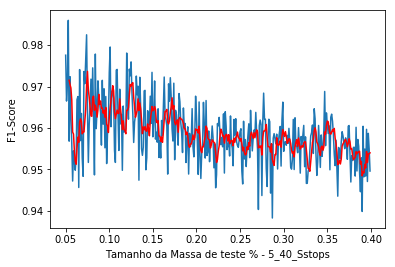

In [50]:
#%matplotlib inline
from pandas import Series
from matplotlib import pyplot
y=[]
for i in range(50,400,1):
    y.append(i/1000)

series = Series(fscore_2_Sstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y,fscore_2_Sstops)
rolling_mean.plot(color='red')
plt.ylabel('F1-Score')
plt.xlabel('Tamanho da Massa de teste % - 5_40_Sstops')
#plt.show()    
#plt.plot(y,fscore)
plt.savefig('Figuras/F1-Score_50_400_Sstops')

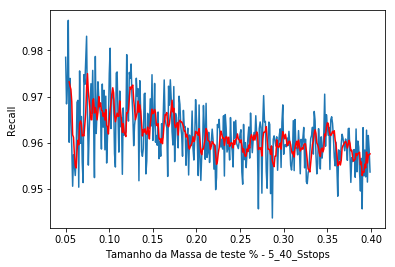

In [51]:
#%matplotlib inline
from pandas import Series
from matplotlib import pyplot
y=[]
for i in range(50,400,1):
    y.append(i/1000)

series = Series(recall_2_Sstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y,recall_2_Sstops)
rolling_mean.plot(color='red')
plt.ylabel('Recall')
plt.xlabel('Tamanho da Massa de teste % - 5_40_Sstops')
#plt.show()    
#plt.plot(y,fscore)
plt.savefig('Figuras/Recall_50_400_Sstops')

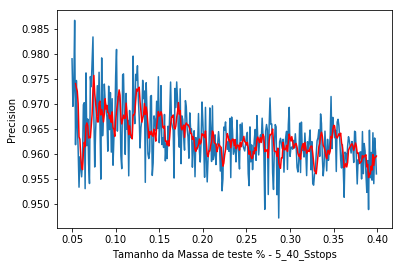

In [52]:
#%matplotlib inline
from pandas import Series
from matplotlib import pyplot
y=[]
for i in range(50,400,1):
    y.append(i/1000)

series = Series(precision_2_Sstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y,precision_2_Sstops)
rolling_mean.plot(color='red')
plt.ylabel('Precision')
plt.xlabel('Tamanho da Massa de teste % - 5_40_Sstops')
#plt.show()    
#plt.plot(y,fscore)
plt.savefig('Figuras/Precision_50_400_Sstops')

# Model_BOW_C_StopWords

In [32]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
precision_2_Cstops = []
recall_2_Cstops = []
fscore_2_Cstops = []
precision_3_Cstops=[]
for j in range(50,400,1):
    for i in range(1,15):
            precision = []
            recall = []
            fscore = []
            msg_train=''
            msg_test =''
            label_train =''
            label_test =''
            msg_train, msg_test, label_train, label_test = \
            train_test_split(data_set['Mensagem'], data_set['Classe'], test_size=j/1000)


            pipeline = Pipeline([
                ('bow', CountVectorizer()),  # Tokeniza as mensagens
                ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
                ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.

            ])

            pipeline.fit(msg_train,label_train)
            predictions = pipeline.predict(msg_test)
            precision.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[0])
            recall.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[1])
            fscore.append(precision_recall_fscore_support(label_test, predictions, average='weighted')[2])
    precision_2_Cstops.append(np.mean(precision))
    recall_2_Cstops.append(np.mean(recall))
    fscore_2_Cstops.append(np.mean(fscore))
for j in range(55,400,5):
    precision_3_Cstops.append(np.mean(precision_2_Cstops[j-5:j]))
    
#print(recall_2)
#print(precision_2)
#print(fscore_2)

CPU times: user 7min 6s, sys: 1.43 s, total: 7min 8s
Wall time: 7min 8s


/home/diego/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/diego/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Recall - F1_Score - Precision (com stopWords)

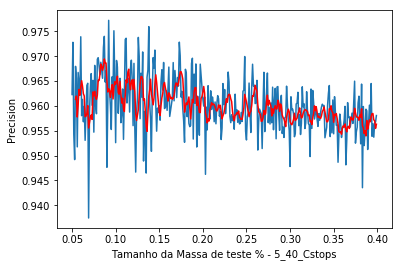

In [58]:
#%matplotlib inline
from pandas import Series
from matplotlib import pyplot
y=[]
for i in range(50,400,1):
    y.append(i/1000)

series = Series(precision_2_Cstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y, precision_2_Cstops)
rolling_mean.plot(color='red')
plt.ylabel('Precision')
plt.xlabel('Tamanho da Massa de teste % - 5_40_Cstops')
#plt.show()    
#plt.plot(y,fscore)
plt.savefig('Figuras/Precision_5_40_Cstops')

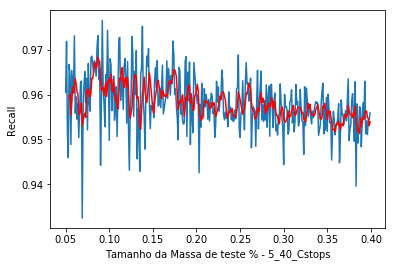

In [59]:
series = Series(recall_2_Cstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y,recall_2_Cstops)
rolling_mean.plot(color='red')
plt.ylabel('Recall')
plt.xlabel('Tamanho da Massa de teste % - 5_40_Cstops')  
#plt.plot(y,fscore)
plt.savefig('Figuras/Recall_5-40_Cstops')

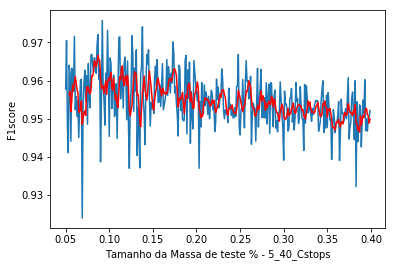

In [60]:
series = Series(fscore_2_Cstops,index = y)
# Tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
# plot original and transformed dataset
plt.plot(y,fscore_2_Cstops)
rolling_mean.plot(color='red')
pyplot.ylabel('F1score')
pyplot.xlabel('Tamanho da Massa de teste % - 5_40_Cstops')

plt.savefig('Figuras/F1score_5-40_Cstops')